In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
visa_df=pd.read_csv("C:\\Users\\ashux\\OneDrive\\Python Notes\\EDA\\skewed_sample_data.csv")
visa_df

,Name,Country,State,Income,Savings,Age,Gender,Occupation,Education,Marital_Status,Number_of_Children,Credit_Score
0,John Jones,Canada,Quebec,43876,21303,63,Female,Lawyer,Master's,Single,4,805
1,Michael Garcia,USA,Texas,57677,7576,57,Male,Teacher,PhD,Single,3,478
2,Jane Garcia,Canada,Alberta,47696,20253,37,Female,Engineer,Master's,Divorced,0,307
3,Jane Martinez,India,Karnataka,43616,15030,48,Male,Lawyer,Master's,Divorced,0,490
4,Tom Davis,Australia,Tasmania,36531,34841,64,Female,Teacher,High School,Married,1,760
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Katie Rodriguez,Canada,Ontario,32458,7903,60,Male,Artist,PhD,Divorced,1,439
24996,Tom Rodriguez,India,Maharashtra,48450,11819,62,Male,Doctor,PhD,Married,3,621
24997,David Martinez,India,Bihar,52914,2661,38,Male,Doctor,High School,Widowed,1,710
24998,Emily Jones,India,Karnataka,110023,17774,26,Male,Teacher,Master's,Married,2,683


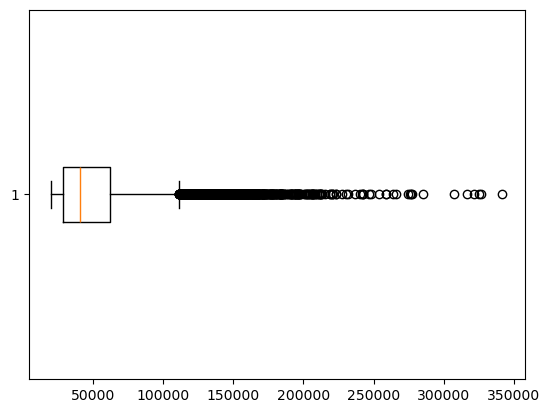

In [3]:
plt.boxplot(visa_df["Income"],vert=False)
plt.show()

# Orange line : Median value = 50p data
# Black dots all are outliers

**Procedure to find the Outliers**

$Step-1$:

- Calculate Q1, Q2 and Q3

$Step-2$:

- Calculate IQR = (Q3-Q1)

$Step-3$:

- Calculate Upper Bound (UB) = Q3 + 1.5 * IQR
- Calculate Lower Bound (LB) = Q1 - 1.5 * IQR

$Step-4$:

- Find the outliers which are having greater than UB
- Find the outliers which are having lower than LB

In [5]:
#Step-1
Q1=np.quantile(visa_df["Income"],0.25)
Q2=np.quantile(visa_df["Income"],0.50)
Q3=np.quantile(visa_df["Income"],0.75)

#Step-2
IQR=Q3-Q1

#Step-3
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

#Step-4
con1=visa_df['Income']>UB
con2=visa_df['Income']<LB

outlier_df=visa_df[con1 | con2]
outlier_df

,Name,Country,State,Income,Savings,Age,Gender,Occupation,Education,Marital_Status,Number_of_Children,Credit_Score
8,Chris Martinez,Australia,Western Australia,119447,289,34,Female,Engineer,High School,Divorced,1,697
20,John Jones,Australia,Queensland,135356,14107,55,Female,Artist,Bachelor's,Single,4,691
52,Alex Miller,India,Gujarat,153634,7282,34,Male,Artist,High School,Married,0,776
70,Alex Jones,India,Gujarat,132470,11064,27,Female,Artist,Bachelor's,Divorced,4,625
72,Tom Garcia,Canada,Alberta,132857,90,59,Female,Lawyer,Master's,Married,0,654
...,...,...,...,...,...,...,...,...,...,...,...,...
24837,Alex Miller,India,Bihar,140292,28663,62,Male,Artist,High School,Single,2,410
24852,Michael Jones,USA,Florida,143905,23190,27,Female,Artist,Bachelor's,Widowed,0,667
24854,Sarah Martinez,India,Gujarat,165884,17497,36,Male,Engineer,PhD,Widowed,2,642
24873,Sarah Jones,USA,New York,144235,7542,33,Male,Teacher,High School,Divorced,0,620


In [6]:
def outliers(col):
    Q1=np.quantile(visa_df[col],0.25)
    Q2=np.quantile(visa_df[col],0.50)
    Q3=np.quantile(visa_df[col],0.75)
    IQR=Q3-Q1
    UB=Q3+1.5*IQR
    LB=Q1-1.5*IQR
    con1=visa_df[col]>UB
    con2=visa_df[col]<LB
    outlier_df=visa_df[con1 | con2]
    print(f'{col} has {len(outlier_df)} outliers')

num_col=visa_df.select_dtypes(exclude='object').columns
for col in num_col:
    outliers(col)

Income has 1178 outliers
Savings has 1178 outliers
Age has 0 outliers
Number_of_Children has 0 outliers
Credit_Score has 0 outliers


In [7]:
Q1=np.quantile(visa_df['Income'],0.25)
Q2=np.quantile(visa_df['Income'],0.50)
Q3=np.quantile(visa_df['Income'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

################ Outliers df ###################

con1=visa_df['Income']>UB
con2=visa_df['Income']<LB
outlier_df=visa_df[con1 | con2]

################# Non Outliers df #####################

con11=visa_df['Income']<UB
con22=visa_df['Income']>LB
non_outlier_df=visa_df[con11 & con22]

len(outlier_df), len(non_outlier_df)

(1178, 23822)

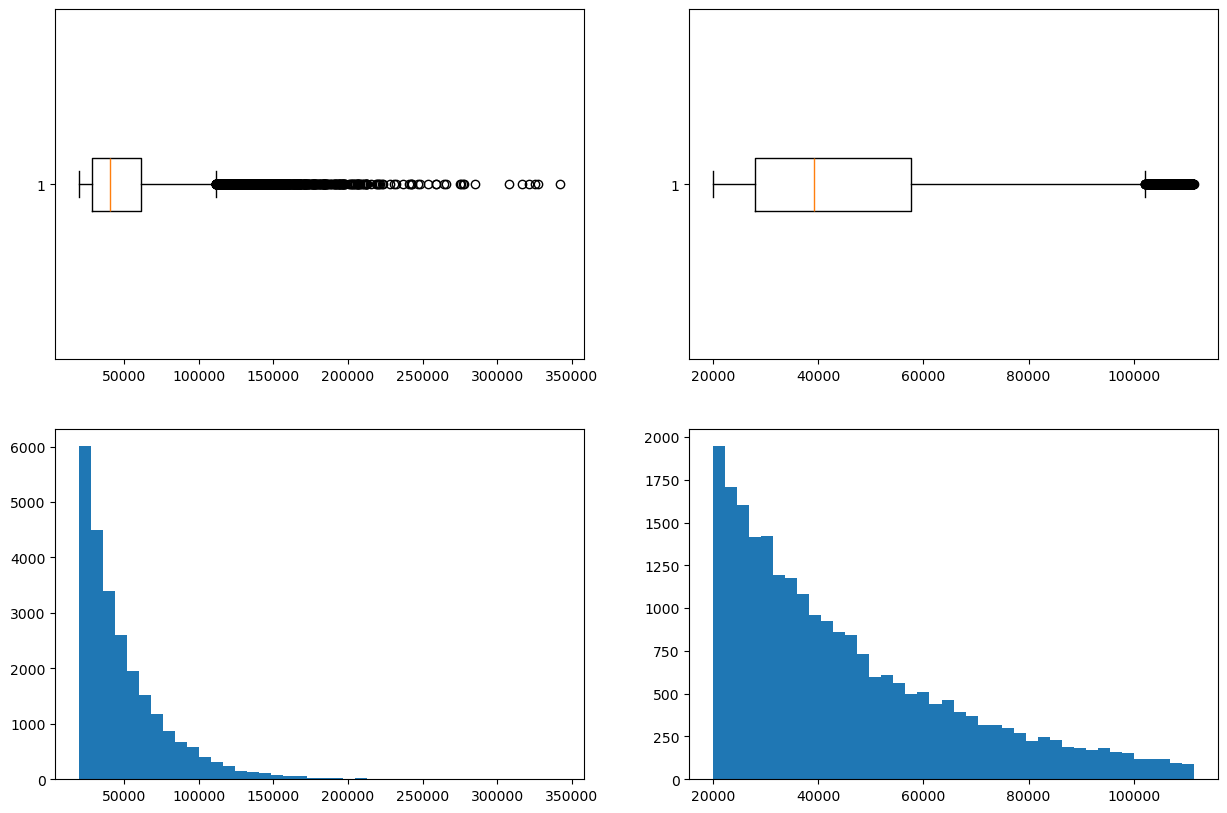

In [8]:
# Will compare
# Total data vs non outliers data

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.boxplot(visa_df['Income'],vert=False)
plt.subplot(2,2,2)
plt.boxplot(non_outlier_df['Income'],vert=False)
plt.subplot(2,2,3)
plt.hist(visa_df['Income'],bins=40)
plt.subplot(2,2,4)
plt.hist(non_outlier_df["Income"],bins=40)
plt.show()

**How to deal with the outliers**

- Drop the outliers based on some percentage
   
    - If you have very huge data
    
    - And the outliers percentage is <2, then drop the outliers
    
    - Drop the outliers means, we are removing some rows all the columns
    
    - In the above examples total count=25000, ouliers=1178, %=4.7
    
    - After removing 1178 observations, we have 23822 observations (95.3% of data)


- Impute (Fill) the outliers with Median value
   
    - We already know that outliers does not affect Median value
    
    - So if you dont want loss the data, and you want fill the outliers then use Median


- Impute (Fill) with UB and LB values
   
    - Fill the outliers with UB value which are > UB
    
    - Fill the outliers with LB value which are < LB

**Using Median Imputation and Concatenate DataFrames**

In [11]:
# To deal the outliers
# Drop : Not recommended > 2%
# Median Value : Outliers doesnot affect Median

# Two types of dataframe are there
# Outliers_data  and  non_outliers_data

In [12]:
# Median value of original dataframe(visa_df)
outlier_df['Income']=int(visa_df['Income'].median())
m_df=outlier_df

C:\Users\ashux\AppData\Local\Temp\ipykernel_18108\751287571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['Income']=int(visa_df['Income'].median())


In [13]:
n1=pd.merge(m_df,non_outlier_df,how='outer')
n1

,Name,Country,State,Income,Savings,Age,Gender,Occupation,Education,Marital_Status,Number_of_Children,Credit_Score
0,Alex Brown,Australia,New South Wales,26680,30935,54,Male,Artist,High School,Single,0,669
1,Alex Brown,Australia,New South Wales,32763,14167,64,Male,Engineer,Master's,Widowed,3,398
2,Alex Brown,Australia,New South Wales,33272,4734,46,Male,Engineer,PhD,Widowed,3,744
3,Alex Brown,Australia,New South Wales,49652,3234,53,Male,Teacher,Master's,Divorced,0,307
4,Alex Brown,Australia,New South Wales,55670,1911,55,Female,Doctor,PhD,Married,0,760
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,Tom Williams,USA,Texas,33198,18950,51,Male,Doctor,High School,Widowed,2,777
24996,Tom Williams,USA,Texas,48738,1377,38,Female,Engineer,High School,Single,3,473
24997,Tom Williams,USA,Texas,71844,20945,39,Female,Lawyer,High School,Married,0,555
24998,Tom Williams,USA,Texas,85664,22030,47,Male,Lawyer,High School,Married,0,636


In [14]:
n2=pd.concat([non_outlier_df,m_df])
n2

,Name,Country,State,Income,Savings,Age,Gender,Occupation,Education,Marital_Status,Number_of_Children,Credit_Score
0,John Jones,Canada,Quebec,43876,21303,63,Female,Lawyer,Master's,Single,4,805
1,Michael Garcia,USA,Texas,57677,7576,57,Male,Teacher,PhD,Single,3,478
2,Jane Garcia,Canada,Alberta,47696,20253,37,Female,Engineer,Master's,Divorced,0,307
3,Jane Martinez,India,Karnataka,43616,15030,48,Male,Lawyer,Master's,Divorced,0,490
4,Tom Davis,Australia,Tasmania,36531,34841,64,Female,Teacher,High School,Married,1,760
...,...,...,...,...,...,...,...,...,...,...,...,...
24837,Alex Miller,India,Bihar,40563,28663,62,Male,Artist,High School,Single,2,410
24852,Michael Jones,USA,Florida,40563,23190,27,Female,Artist,Bachelor's,Widowed,0,667
24854,Sarah Martinez,India,Gujarat,40563,17497,36,Male,Engineer,PhD,Widowed,2,642
24873,Sarah Jones,USA,New York,40563,7542,33,Male,Teacher,High School,Divorced,0,620


In [15]:
# All Together

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

visa_df=pd.read_csv("C:\\Users\\ashux\\OneDrive\\Python Notes\\EDA\\EDA_large_data.csv")

Q1=np.quantile(visa_df['Income'],0.25)
Q2=np.quantile(visa_df['Income'],0.50)
Q3=np.quantile(visa_df['Income'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

################ Outliers df ###################

con1=visa_df['Income']>UB
con2=visa_df['Income']<LB
outlier_df=visa_df[con1 | con2]

################# Non Outliers df #####################

con11=visa_df['Income']<UB
con22=visa_df['Income']>LB
non_outlier_df=visa_df[con11 & con22]

################## Imputing with median value ###########################

outlier_df['Income']=visa_df['Income'].median()
modified_data=outlier_df

################ Merging the two DataFrames ######################

final_df=pd.concat([non_outlier_df,modified_data])
final_df2=pd.merge(non_outlier_df,modified_data,how="outer")

C:\Users\ashux\AppData\Local\Temp\ipykernel_18108\56766498.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outlier_df['Income']=visa_df['Income'].median()


{'whiskers': [<matplotlib.lines.Line2D at 0x1f83db1a6f0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f83db1acc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f83db1a450>],
 'medians': [<matplotlib.lines.Line2D at 0x1f83db1b140>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f83db1b3e0>],
 'means': []}

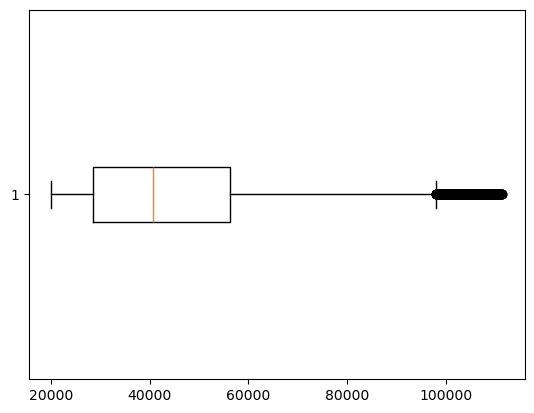

In [16]:
plt.boxplot(n2['Income'],vert=False)

(array([ 301.,  985., 2147., 3843., 5381., 5047., 3827., 2192.,  961.,
         316.]),
 array([10015.81, 18028.08, 26040.35, 34052.62, 42064.89, 50077.16,
        58089.43, 66101.7 , 74113.97, 82126.24, 90138.51]),
 <BarContainer object of 10 artists>)

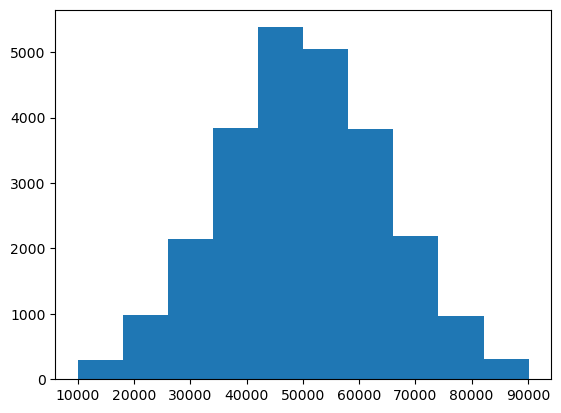

In [17]:
plt.hist([final_df['Income']])

**np.where**

- np.where is used to fill the values based on True condition

- np.where will take 3 arguments

    - Condition

    - Value you want to replace, if that condition is true

    - Value you want to replace, if the condition is false

- np.where(Condition,True_value,False_value)

In [20]:
d1=pd.DataFrame()
d1['Name']=['Ramesh','Suresh','Sathish']
d1['Age']=[24,30,32]
d1

,Name,Age
0,Ramesh,24
1,Suresh,30
2,Sathish,32


In [21]:
# In the age column > 25 I want to replace with 300

In [22]:
d1['Age']>25

0    False
1     True
2     True
Name: Age, dtype: bool

In [23]:
# Where ever True : 300
# Where ever False : Keep as it is

con=d1['Age']>25
d1['Age']=np.where(con,300,d1['Age'])
d1

,Name,Age
0,Ramesh,24
1,Suresh,300
2,Sathish,300


In [24]:
Q1=np.quantile(visa_df['Income'],0.25)
Q2=np.quantile(visa_df['Income'],0.50)
Q3=np.quantile(visa_df['Income'],0.75)
IQR=Q3-Q1
UB=Q3+1.5*IQR
LB=Q1-1.5*IQR

con1=visa_df['Income']>UB
con2=visa_df['Income']<LB
conx = con1 | con2

visa_df['Income']=np.where(conx,visa_df['Income'].median(),visa_df['Income'])
visa_df

,ID,Age,Gender,Income,Spend_Score,Region,Customer_Type,Purchase_Frequency,Savings,Credit_Score,Online_Shopping,Loyalty_Points
0,1,56,Male,49770.79,27,East,New,2,20697.08,620,No,1400
1,2,49,Female,57777.86,35,South,VIP,2,24308.49,822,No,3624
2,3,50,Female,57966.19,82,South,VIP,2,29561.40,652,Yes,9523
3,4,33,Female,59555.88,30,North,VIP,2,22868.76,503,No,244
4,5,29,Male,60871.07,14,East,New,3,31972.05,454,Yes,375
...,...,...,...,...,...,...,...,...,...,...,...,...
24995,24996,42,Male,47428.10,95,East,Returning,4,19250.61,429,No,3504
24996,24997,45,Male,73364.48,46,East,Returning,2,26113.03,555,No,148
24997,24998,60,Male,48966.95,41,South,VIP,1,5739.21,497,Yes,5832
24998,24999,30,Female,49105.76,85,South,Returning,4,9281.24,729,No,4737


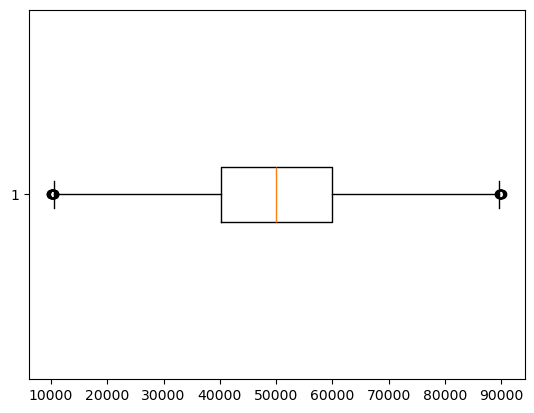

In [68]:
plt.boxplot(visa_df['Income'],vert=False)
plt.show()

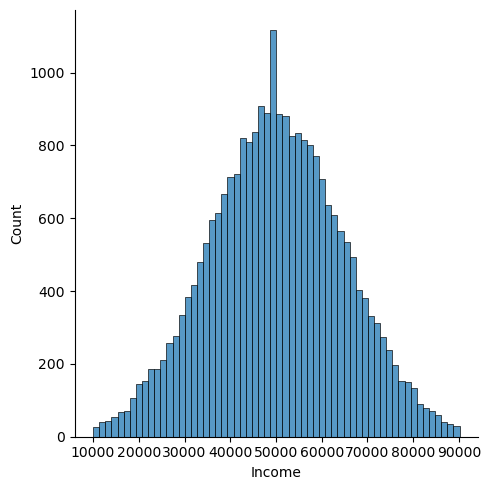

In [85]:
sns.displot(visa_df['Income'])
plt.show()